In [223]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [240]:
# Importar datos
#columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins","Color intensity","Hue", "OD280/OD315", "Proline"]
#df = 
#df = pd.read_csv('wine.data',names = columns)
df = pd.read_csv('Salary_Data.csv')

In [241]:
df.shape

(30, 2)

In [242]:
# Observar si hay NaNs
df.duplicated().sum()

0

In [227]:
df = df.dropna()

In [228]:
df.shape

(5000, 7)

In [229]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [262]:
# Realizamos un scatterplot para todos los variables.
# Para observar cuál de los datos se asimilan más a un comportamiento lineal con menor dispersidad. 
#pd.plotting.scatter_matrix(df,figsize = (30,30))

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

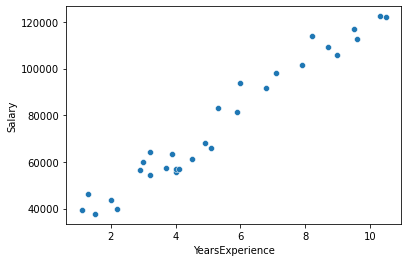

In [244]:
# Visualizamos los datos con un scatterplot
# Para observar cuál de los datos se asimilan más a un comportamiento lineal con menor dispersidad. 
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

In [245]:
# Vamos a dividir el df para prueba y entrenamiento
df_x = df['YearsExperience']
df_y = df['Salary']
testp = 0.25
seed = 1800

x_train,x_test,y_train,y_test = train_test_split(df_x, df_y, test_size = testp)

In [246]:
y_test.shape

(8,)

[Text(0.5, 1.0, 'Datos de prueba')]

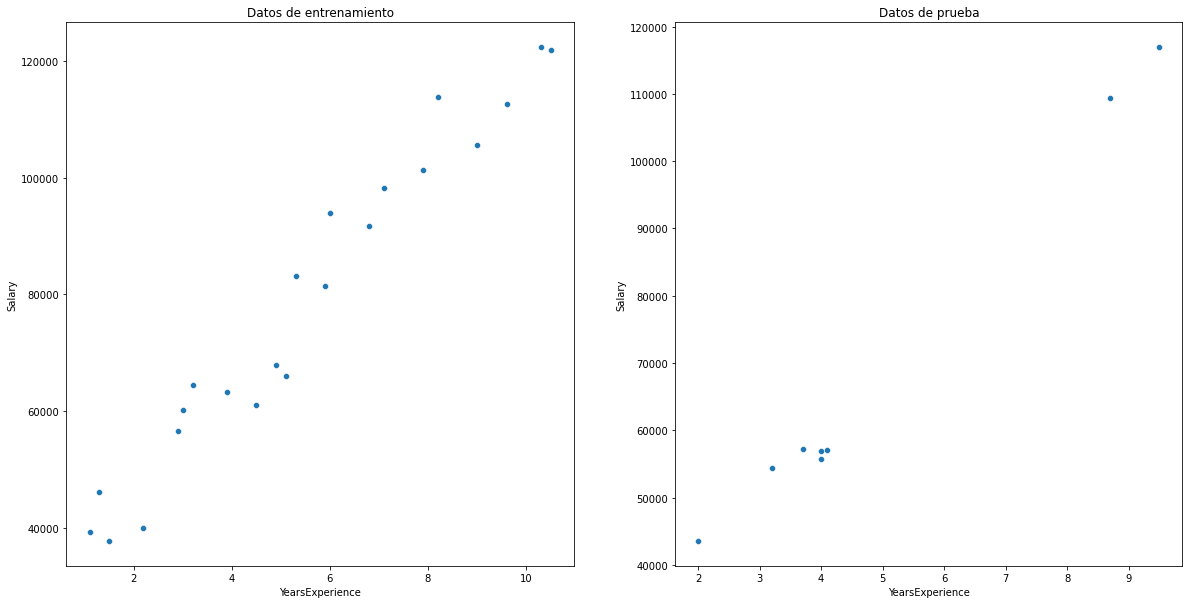

In [247]:
# Visualización de los datos de entrenamiento y prueba
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(x = x_train, y = y_train,ax=ax[0]).set(title = 'Datos de entrenamiento')
sns.scatterplot(x = x_test, y= y_test,ax=ax[1]).set(title = 'Datos de prueba')

In [258]:
# Hipótesis (entrenamiento y error)
h = lambda x, theta: theta[0] + theta[1]*x
j_i = lambda x, y, theta: (h(x, theta) - y)**2 

# Parametros
alpha = 0.01
n = 10000
theta = [1.5, 0.1]

In [259]:
# Entrenamiento
for i in range(n):
  delta = []
  deltax = []

  for x_i, y_i in zip(x_train, y_train):
    delta.append(h(x_i, theta) - y_i)
    deltax.append((h(x_i, theta) - y_i)*x_i)

  # Thetas
  theta[0] = theta[0] - alpha/n*sum(delta)
  theta[1] = theta[1] - alpha/n*sum(deltax)

print(theta)

[3094.2036432835457, 12823.624153058485]


In [260]:
# Training
delta_train = []
for x_i, y_i in zip(x_train, y_train):
  delta_train.append(j_i(x_i, y_i, theta))  
 
J_train = 1/(2*n)*sum(delta_train)

# Validación
delta_test = []
for x_i, y_i in zip(x_test, y_test):
  delta_test.append(j_i(x_i, y_i, theta))  
 
J_test = 1/(2*n)*sum(delta_test)

print("Error en el train:", J_train)
print("Error en el test:", J_test)
print("Valores de las thetas", theta)

Error en el train: 190472.32814793618
Error en el test: 23511.982802373524
Valores de las thetas [3094.2036432835457, 12823.624153058485]


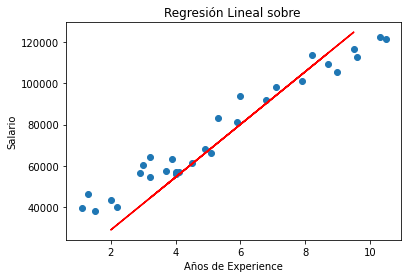

In [261]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(x_test, theta[0] + theta[1]*x_test, 'r')
plt.title("Regresión Lineal sobre ")
plt.xlabel("Años de Experience")
plt.ylabel("Salario")
plt.show()

In [279]:
# Realizar predicciones con nuestras thetas respectivas 
y_pred = theta[0]+theta[1]*x_test

# Coeficiente de determinación
c_mat = np.corrcoef(y_test, y_pred)
CoD = c_mat[0,1]
CoD = CoD**2
print("El coeficiente de determinación es de:", CoD)

#MSE Mean Squared Error 
MSE = np.square(np.subtract(y_test, y_pred)).mean()
print("El error cuadratico medio es de:", MSE)

El coeficiente de determinación es de: 0.9875928586744418
El error cuadratico medio es de: 58779957.00593381


/Users/camilacusicanqui/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/camilacusicanqui/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


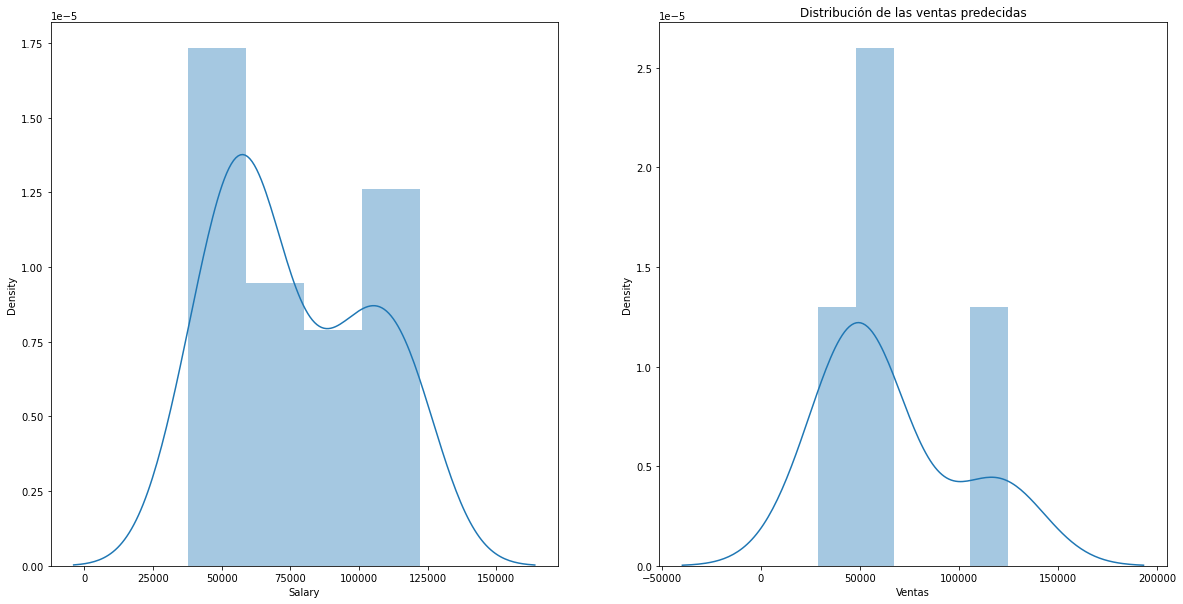

In [265]:
# Como podemos observar tenemos un muy buen coeficiente de determinación, es decir, nuestro modelo de regresión lineal. 

# Originalmente nuestros datos de las ventas se comportan de la siguiente manera

fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.distplot(df["Salary"],ax = ax[0])
plt.title("Distribución de las ventas ")
plt.xlabel("Ventas")

sns.distplot(y_pred,ax = ax[1])
plt.title("Distribución de las ventas predecidas")
plt.xlabel("Ventas")
plt.show()

In [266]:
# Observamos un comportamiento similar en las dos gráficas. 
# Ambas presentan dos picos donde el de la izquierda es más pronunciada.
# Sin embargo, los picos de la predicción de ventas están desplazados hacia la derecha. 
# Es decir, presenta un sesgo negativa. 

In [267]:
from statistics import variance

In [268]:
print("La varianza de y prueba es " + str(variance(df["Salary"])))
print("La varianza de y modelo es " + str(variance(y_pred)))

La varianza de y prueba es 751550960.4137931
La varianza de y modelo es 1188704860.3995128


In [ ]:
#Como podemos observar la varianza del modelo es mayor a la varianza de la y de prueba. 
# La y predecida se dispersa más que la y de nuestra prueba.

In [269]:
# Underfitting o Overfitting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

model = LinearRegression()

In [273]:
model = LinearRegression()

In [280]:
# Para observar si tenemos underfitting o overfitting utilizaremos
# Queremos observar el learning curve de nuestro modelo 
y_pred = theta[0]+theta[1]*x_train
MSE = np.square(np.subtract(y_train, y_pred)).mean()
print("El error cuadratico medio es de:", MSE)
# Coeficiente de determinación
c_mat = np.corrcoef(y_train, y_pred)
CoD = c_mat[0,1]
CoD = CoD**2
print("El coeficiente de determinación es de:", CoD)

El error cuadratico medio es de: 173156661.95266923
El coeficiente de determinación es de: 0.9551567153288066
